In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

"""import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"import os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

# Data Validation Utilities

In [ ]:
import pandas as pd
import numpy as np

def validate_dataframe(df, name="DataFrame"):
    """
    Validate and print comprehensive statistics about a DataFrame.
    
    Args:
        df: pandas DataFrame to validate
        name: Name of the DataFrame for display purposes
    
    Returns:
        dict: Dictionary containing validation results
    """
    print(f"\n{'='*50}")
    print(f"Validation Report for: {name}")
    print(f"{'='*50}")
    
    # Basic info
    print(f"\n📊 Shape: {df.shape[0]:,} rows x {df.shape[1]} columns")
    print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Data types
    print(f"\n📋 Data Types:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"  • {dtype}: {count} columns")
    
    # Missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    has_missing = missing[missing > 0]
    
    if len(has_missing) > 0:
        print(f"\n⚠️  Missing Values: {len(has_missing)} columns affected")
        print(f"  Top 5 columns with missing data:")
        for col in has_missing.nlargest(5).index:
            print(f"    • {col}: {missing[col]:,} ({missing_pct[col]}%)")
    else:
        print("\n✅ No missing values detected")
    
    # Duplicates
    dup_count = df.duplicated().sum()
    if dup_count > 0:
        print(f"\n⚠️  Duplicate Rows: {dup_count:,} ({dup_count/len(df)*100:.2f}%)")
    else:
        print("\n✅ No duplicate rows detected")
    
    # Infinite values
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    inf_counts = {}
    for col in numeric_cols:
        inf_count = np.isinf(df[col]).sum()
        if inf_count > 0:
            inf_counts[col] = inf_count
    
    if inf_counts:
        print(f"\n⚠️  Infinite Values: {len(inf_counts)} columns affected")
        for col, count in list(inf_counts.items())[:5]:
            print(f"    • {col}: {count:,}")
    else:
        print("\n✅ No infinite values detected")
    
    print(f"\n{'='*50}\n")
    
    return {
        'shape': df.shape,
        'missing_columns': len(has_missing),
        'duplicates': dup_count,
        'infinite_values': sum(inf_counts.values()) if inf_counts else 0
    }

In [94]:
#df =pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")

In [95]:
#X_test =pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [96]:
#df.shape

In [97]:
#df.head(2)

In [98]:
#df.columns

In [99]:
"""X =df.drop("target",axis =1)
y =df["target"]

from sklearn.dummy import DummyClassifier
model =DummyClassifier().fit(X,y)
y_pred =model.predict(X_test)"""

'X =df.drop("target",axis =1)\ny =df["target"]\n\nfrom sklearn.dummy import DummyClassifier\nmodel =DummyClassifier().fit(X,y)\ny_pred =model.predict(X_test)'

In [100]:
"""submission = pd.DataFrame({"id": range(0,X_test.shape[0]),
"target": y_pred})
submission.to_csv('submission.csv',index =False)"""

'submission = pd.DataFrame({"id": range(0,X_test.shape[0]),\n"target": y_pred})\nsubmission.to_csv(\'submission.csv\',index =False)'

# Summary Statistics 

In [ ]:
import pandas as pd

# File paths
train_path =r"/kaggle/input/System-Threat-Forecaster/train.csv"
test_path = r"/kaggle/input/System-Threat-Forecaster/test.csv"

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Validate datasets using the utility function
train_validation = validate_dataframe(train_df, "Training Dataset")
test_validation = validate_dataframe(test_df, "Test Dataset")

# Display first few rows of datasets
train_head = train_df.head()
test_head = test_df.head()

# Summary statistics
train_desc = train_df.describe()
test_desc = test_df.describe()

# Check for missing values
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

print("Train Head:\n", train_head)
print("Train Description:\n", train_desc)
print("Train Missing Values:\n", train_missing)
print("Test Head:\n", test_head)
print("Test Description:\n", test_desc)
print("Test Missing Values:\n", test_missing)

Train Head:
                           MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3  38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4  32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.275.1003.0           0                      7.0   
1   4.18.1807.18075     1.273.1465.0           0                      7.0   
2   4.18.1807.18075     1.275.1546.0           0                      7.0   
3  4.12.17007.18011     1.275.1141.0           0                      7.0   
4    4.13.17134.228     1.275.1283.0           0                      7.0   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0            53447.0  

# Exploratory Data Analysis (EDA) of Sampled Dataset

**Data Quality Analysis: Missing Values & Outliers**

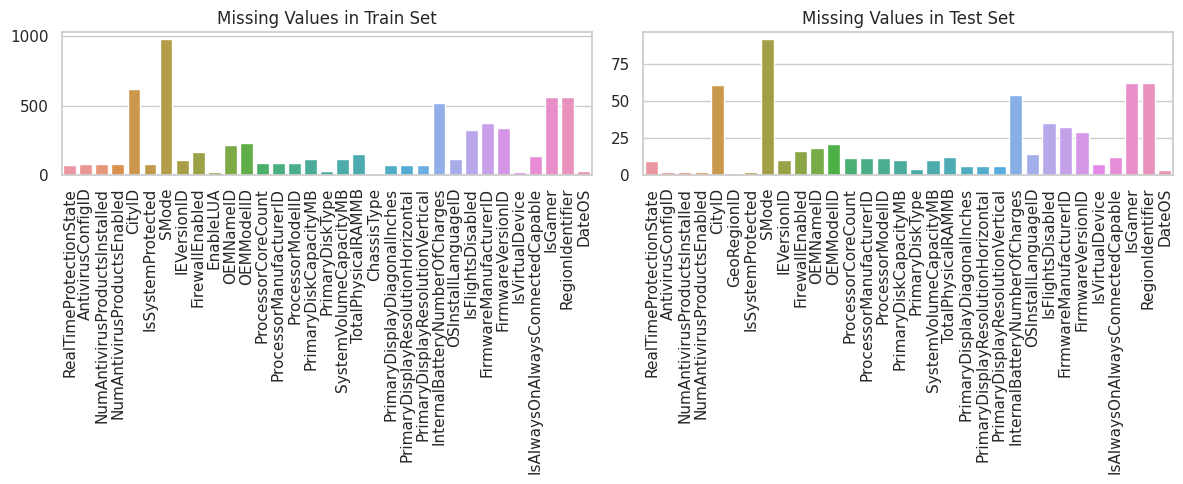

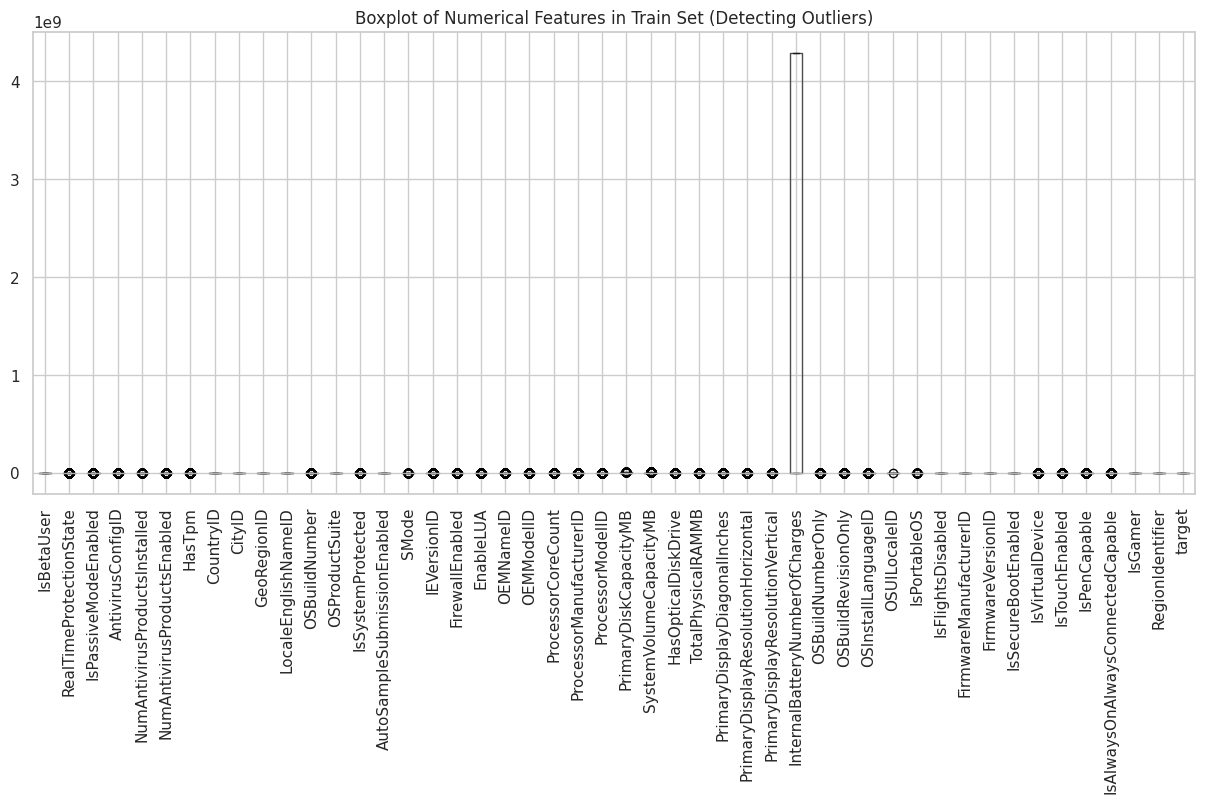

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot missing values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Missing values in train set
sns.barplot(x=train_missing[train_missing > 0].index, y=train_missing[train_missing > 0].values, ax=axes[0])
axes[0].set_title("Missing Values in Train Set")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Missing values in test set
sns.barplot(x=test_missing[test_missing > 0].index, y=test_missing[test_missing > 0].values, ax=axes[1])
axes[1].set_title("Missing Values in Test Set")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Check for outliers using boxplots for numerical features
numeric_cols = train_df.select_dtypes(include=["number"]).columns

# Plot boxplots
plt.figure(figsize=(15, 6))
train_df[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features in Train Set (Detecting Outliers)")
plt.show()


**Visualizing Key Insights from Sampled Data**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

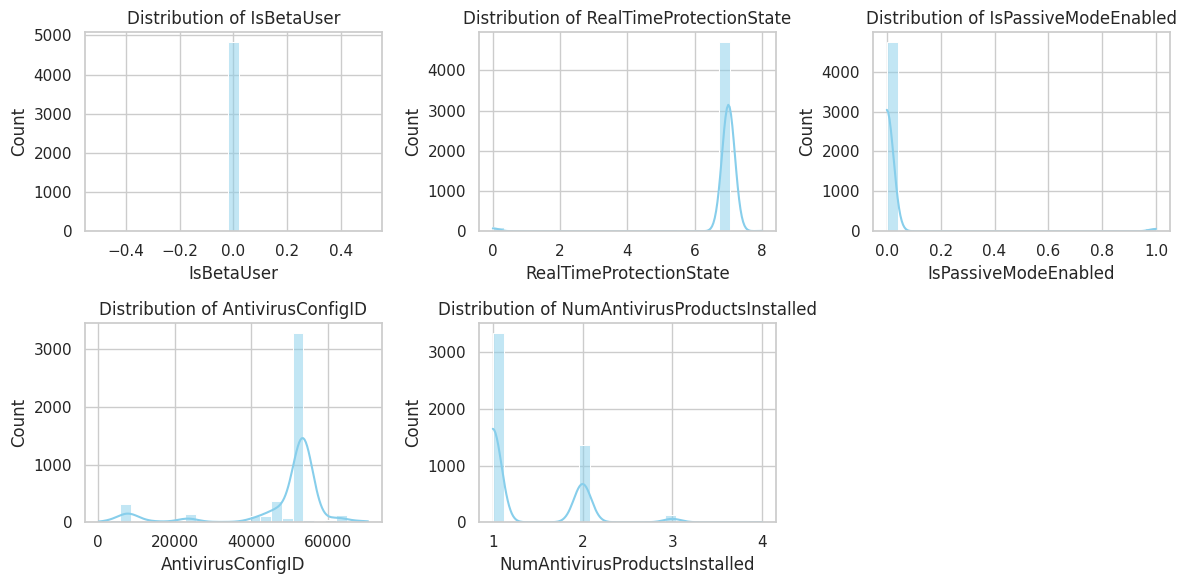

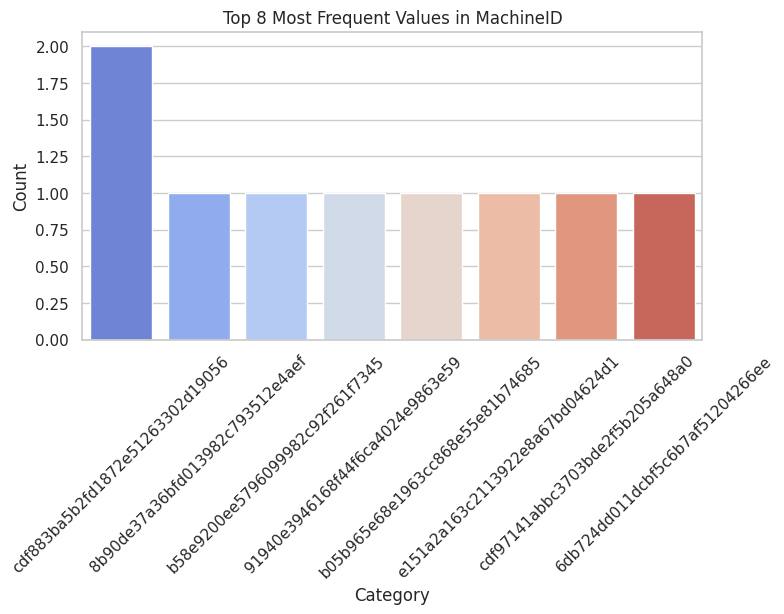

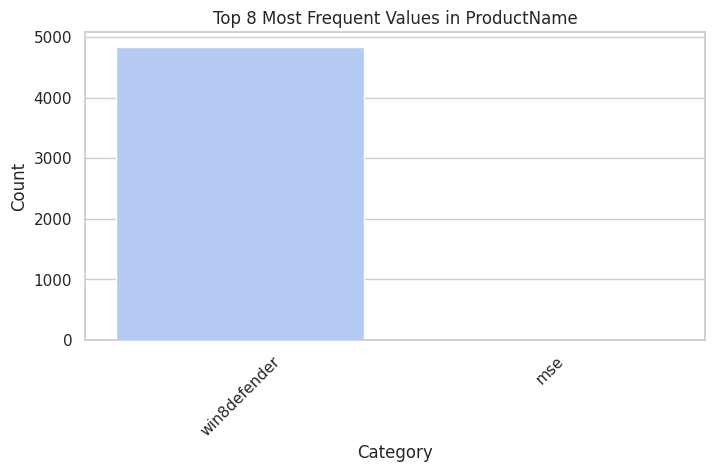

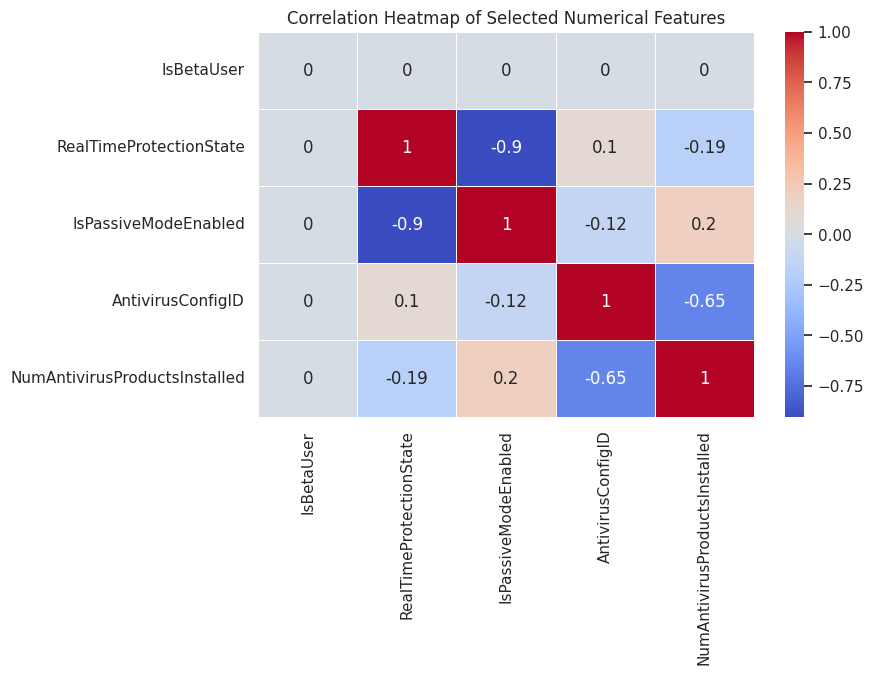

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure train_df is defined before running this snippet
# Sample data (limit to 5000 rows for visualization)
df_sample = train_df.sample(n=min(5000, len(train_df)), random_state=42)

# Handle `inf` values by replacing them with NaN
df_sample.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values to prevent issues
df_sample.dropna(inplace=True)

# Select key numerical & categorical columns
num_cols_sample = df_sample.select_dtypes(include=['number']).columns[:5]  # First 5 numerical
cat_cols_sample = df_sample.select_dtypes(include=['object']).columns[:2]  # First 2 categorical

# Plot histograms for numerical features
if len(num_cols_sample) > 0:
    plt.figure(figsize=(12, 6))
    rows = (len(num_cols_sample) + 2) // 3  # Adjust rows dynamically
    for i, col in enumerate(num_cols_sample, 1):
        plt.subplot(rows, 3, i)  # Adjust grid dynamically
        sns.histplot(df_sample[col], bins=25, kde=True, color='skyblue')
        plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# Count plots for categorical features
for col in cat_cols_sample:
    plt.figure(figsize=(8, 4))
    value_counts = df_sample[col].value_counts().nlargest(8)  # Get top 8 categories
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="coolwarm")  # Corrected order
    plt.title(f"Top 8 Most Frequent Values in {col}")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap (Numerical features only)
if len(num_cols_sample) > 1:
    plt.figure(figsize=(8, 5))
    sns.heatmap(df_sample[num_cols_sample].corr().fillna(0), cmap="coolwarm", annot=True, linewidths=0.5)
    plt.title("Correlation Heatmap of Selected Numerical Features")
    plt.show()


# **Handling Missing Data: Imputation & Column Removal**

In [104]:
import pandas as pd

# File paths
train_path = r"/kaggle/input/System-Threat-Forecaster/train.csv"
test_path = r"/kaggle/input/System-Threat-Forecaster/test.csv"

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Define missing value threshold
missing_threshold = 0.4  # 40% missing values

# Get missing values percentage
missing_train = train_df.isnull().sum() / len(train_df)
missing_test = test_df.isnull().sum() / len(test_df)

# Identify columns to drop
cols_to_drop = missing_train[missing_train > missing_threshold].index.union(
    missing_test[missing_test > missing_threshold].index
)

# Drop columns with too many missing values
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=[col for col in cols_to_drop if col in test_df.columns])

# Fill missing values for categorical columns
cat_cols = train_df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    mode_value = train_df[col].mode()[0]  # Get the most frequent value
    train_df[col] = train_df[col].fillna(mode_value)
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(mode_value)

# Fill missing values for numerical columns
num_cols = train_df.select_dtypes(include=["number"]).columns
num_cols = num_cols[num_cols != "target"]  # Exclude target column if it exists

for col in num_cols:
    median_value = train_df[col].median()  # Get the median value
    train_df[col] = train_df[col].fillna(median_value)
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(median_value)

# Save processed data for future use
train_df.to_csv("processed_train.csv", index=False)
test_df.to_csv("processed_test.csv", index=False)

# Reload processed data if needed
train_df = pd.read_csv("processed_train.csv")
test_df = pd.read_csv("processed_test.csv")

# Verify missing values are handled
print("Missing values in train set after handling:", train_df.isnull().sum().sum())
print("Missing values in test set after handling:", test_df.isnull().sum().sum())

Missing values in train set after handling: 0
Missing values in test set after handling: 0


# **Outlier Detection and Removal Using IQR**

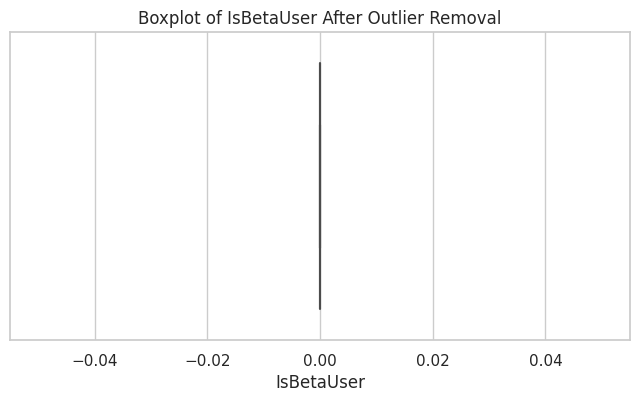

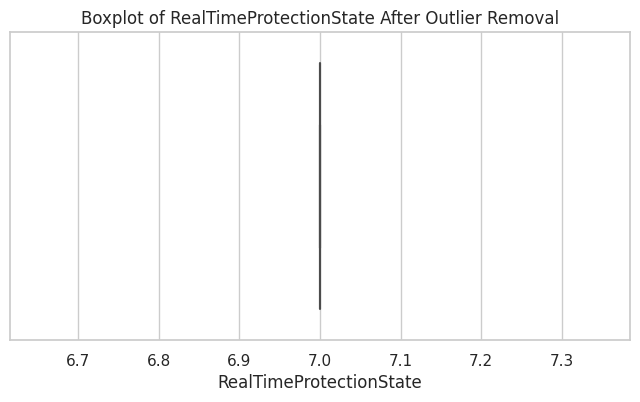

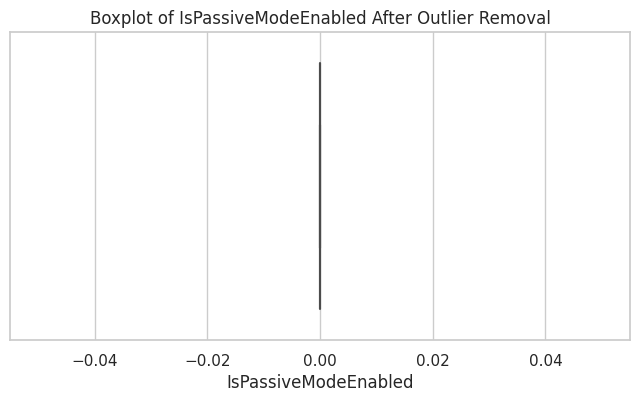

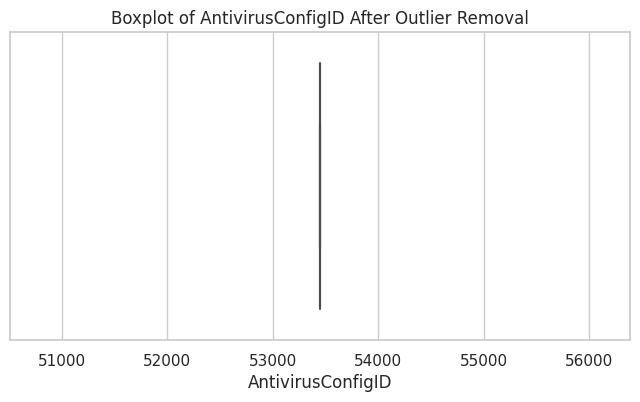

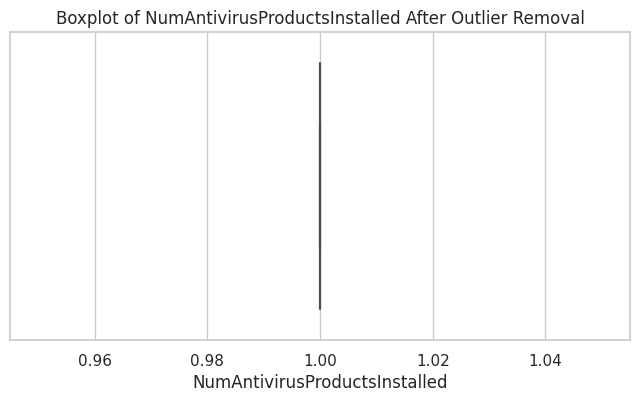

Outlier detection and removal complete. Check the plots for insights.


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed data
train_df = pd.read_csv("processed_train.csv")
test_df = pd.read_csv("processed_test.csv")

# Set style
sns.set(style="whitegrid")

# Outlier Removal using IQR
num_cols = train_df.select_dtypes(include=["number"]).columns
for col in num_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]

# Boxplots for 5 Numerical Features After Outlier Removal
sample_cols = num_cols[:5]  # Selecting first 5 numerical columns
for col in sample_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f"Boxplot of {col} After Outlier Removal")
    plt.show()

print("Outlier detection and removal complete. Check the plots for insights.")

# Logistic Regression - Model 1

****Train-Test Split: Preparing Data for Model Training****

In [106]:
"""from sklearn.model_selection import train_test_split

# Create sequential ID column for test set
test_ids = pd.Series(range(len(test_df)))

# Separate features and target
X = train_df.drop(columns=["target"])
y = train_df["target"]
X_test = test_df.copy()

# Split into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)"""

'from sklearn.model_selection import train_test_split\n\n# Create sequential ID column for test set\ntest_ids = pd.Series(range(len(test_df)))\n\n# Separate features and target\nX = train_df.drop(columns=["target"])\ny = train_df["target"]\nX_test = test_df.copy()\n\n# Split into 80% training and 20% validation\nX_train, X_val, y_train, y_val = train_test_split(\n    X, y, test_size=0.2, stratify=y, random_state=42\n)'

**Building a Machine Learning Pipeline: Preprocessing & Model Setup**

In [107]:
"""from sklearn.metrics import accuracy_score, roc_auc_score

# Train Logistic Regression model
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_pred_proba = model.predict_proba(X_val)[:, 1]  # Get probabilities for AUC
val_auc = roc_auc_score(y_val, val_pred_proba)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation AUC: {val_auc:.4f}")

# Final prediction - Use class labels (0/1)
test_pred = model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'id': test_ids,
    'target': test_pred  # Now contains integers 0/1
})

# Save submission file
submission.to_csv('submission.csv', index=False)"""


'from sklearn.metrics import accuracy_score, roc_auc_score\n\n# Train Logistic Regression model\nmodel.fit(X_train, y_train)\n\n# Predict on validation set\ny_val_pred = model.predict(X_val)\nval_accuracy = accuracy_score(y_val, y_val_pred)\nval_pred_proba = model.predict_proba(X_val)[:, 1]  # Get probabilities for AUC\nval_auc = roc_auc_score(y_val, val_pred_proba)\n\nprint(f"Validation Accuracy: {val_accuracy:.4f}")\nprint(f"Validation AUC: {val_auc:.4f}")\n\n# Final prediction - Use class labels (0/1)\ntest_pred = model.predict(X_test)\n\n# Create submission file\nsubmission = pd.DataFrame({\n    \'id\': test_ids,\n    \'target\': test_pred  # Now contains integers 0/1\n})\n\n# Save submission file\nsubmission.to_csv(\'submission.csv\', index=False)'

# RandomForestClassifier - Model 2

**Train-Test Split: Preparing Data for Model Training**

In [108]:
"""import pandas as pd
from sklearn.model_selection import train_test_split

# Separate features and target
X = train_df.drop(columns=["target"])
y = train_df["target"]

# Split into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)"""

'import pandas as pd\nfrom sklearn.model_selection import train_test_split\n\n# Separate features and target\nX = train_df.drop(columns=["target"])\ny = train_df["target"]\n\n# Split into 80% training and 20% validation\nX_train, X_val, y_train, y_val = train_test_split(\n    X, y, test_size=0.2, random_state=42, stratify=y\n)'

****Building a Machine Learning Pipeline: Random Forest Classifier****

In [109]:
"""from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Identify categorical and numerical columns
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()

# Preprocessing steps: OneHotEncoder for categorical, StandardScaler for numerical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# Create pipeline with Random Forest
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])"""

'from sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Identify categorical and numerical columns\ncat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()\nnum_cols = X_train.select_dtypes(include=["number"]).columns.tolist()\n\n# Preprocessing steps: OneHotEncoder for categorical, StandardScaler for numerical\npreprocessor = ColumnTransformer([\n    ("num", StandardScaler(), num_cols),\n    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)\n])\n\n# Create pipeline with Random Forest\nmodel = Pipeline([\n    ("preprocessor", preprocessor),\n    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))\n])'

****Hyperparameter Tuning & Model Evaluation with RandomizedSearchCV****

In [110]:
"""from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Define a smaller, efficient hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100],  # Reduced from [50, 100, 200]
    'classifier__max_depth': [10, None],  # Limited to 2 values
    'classifier__min_samples_split': [2, 5],  # Removed 10 to reduce space
    'classifier__min_samples_leaf': [1, 2],  # Removed 4 for efficiency
    'classifier__max_features': ['sqrt']  # Using only 'sqrt' for speed
}

# Perform optimized RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_grid, 
    n_iter=5,  # Faster than original 10
    cv=2,  # Reduced from 3
    scoring='roc_auc', 
    n_jobs=-1,  # Uses all CPU cores
    random_state=42
)

# Fit search to the training data
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Predict on validation set using best model
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_pred_proba = best_model.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_val, val_pred_proba)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation AUC: {val_auc:.4f}")

# Final prediction
test_pred = best_model.predict(test_df)

# Save submission file
submission = pd.DataFrame({
    'id': test_df.index,
    'target': test_pred
})
submission.to_csv('submission.csv', index=False)"""

'from sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import accuracy_score, roc_auc_score\nimport numpy as np\n\n# Define a smaller, efficient hyperparameter grid\nparam_grid = {\n    \'classifier__n_estimators\': [50, 100],  # Reduced from [50, 100, 200]\n    \'classifier__max_depth\': [10, None],  # Limited to 2 values\n    \'classifier__min_samples_split\': [2, 5],  # Removed 10 to reduce space\n    \'classifier__min_samples_leaf\': [1, 2],  # Removed 4 for efficiency\n    \'classifier__max_features\': [\'sqrt\']  # Using only \'sqrt\' for speed\n}\n\n# Perform optimized RandomizedSearchCV\nrandom_search = RandomizedSearchCV(\n    model, param_distributions=param_grid, \n    n_iter=5,  # Faster than original 10\n    cv=2,  # Reduced from 3\n    scoring=\'roc_auc\', \n    n_jobs=-1,  # Uses all CPU cores\n    random_state=42\n)\n\n# Fit search to the training data\nrandom_search.fit(X_train, y_train)\n\n# Get the best model\nbest_model = random_search.best_es

# Catboost - Model 3

In [111]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# ===========================
# 1. Load Data
# ===========================
train_df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# Create sequential ID column before dropping MachineID
test_ids = pd.Series(range(len(test_df)))

# Drop MachineID if it exists
if 'MachineID' in train_df.columns:
    train_df.drop('MachineID', axis=1, inplace=True)
if 'MachineID' in test_df.columns:
    test_df.drop('MachineID', axis=1, inplace=True)

# ===========================
# 2. Feature Engineering
# ===========================

# Function to process date columns
def process_dates(df):
    if 'DateAS' in df.columns and 'DateOS' in df.columns:
        df['DateAS'] = pd.to_datetime(df['DateAS'], format='%d-%m-%Y %H:%M', errors='coerce')
        df['DateOS'] = pd.to_datetime(df['DateOS'], format='%d-%m-%Y', errors='coerce')
        df['DaysBetweenASandOS'] = (df['DateAS'] - df['DateOS']).dt.days
        df.drop(['DateAS', 'DateOS'], axis=1, inplace=True)
    return df

# Process dates in train and test data
train_df = process_dates(train_df)
test_df = process_dates(test_df)

# Function to split version strings into multiple numerical columns
def split_version(df, col):
    if col in df.columns:
        version_parts = df[col].astype(str).str.split('.', expand=True).fillna(0)
        version_parts = version_parts.apply(pd.to_numeric, errors='coerce').fillna(0)
        version_parts.columns = [f"{col}_part_{i}" for i in range(version_parts.shape[1])]
        df = df.drop(col, axis=1).join(version_parts)
    return df

# Process version columns
version_cols = ['EngineVersion', 'AppVersion', 'SignatureVersion', 'OSBuildLab']
for col in version_cols:
    train_df = split_version(train_df, col)
    test_df = split_version(test_df, col)

# ===========================
# 3. Data Preprocessing
# ===========================

# Separate features and target
X = train_df.drop(columns=['target'])
y = train_df['target']
X_test = test_df.copy()

# Function to handle missing values
def safe_fillna(df):
    df_filled = df.copy()
    for col in df.columns:
        if df[col].dtype == 'object':
            df_filled[col] = df[col].fillna('missing')
        else:
            df_filled[col] = df[col].fillna(df[col].median())
    return df_filled

# Apply missing value handling
X = safe_fillna(X)
X_test = safe_fillna(X_test)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Identify categorical feature indices for CatBoost
cat_features = [X.columns.get_loc(col) for col in X.select_dtypes(include='object').columns]

# ===========================
# 4. Model Training & Hyperparameter Tuning
# ===========================

# Initialize and train CatBoost model
model = CatBoostClassifier(
    cat_features=cat_features,
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    early_stopping_rounds=50,
    random_seed=42,
    verbose=100
)

# Train the model with early stopping
model.fit(X_train, y_train, eval_set=(X_val, y_val))

# ===========================
# 5. Model Evaluation
# ===========================

# Get predicted probabilities for validation set
val_pred_proba = model.predict_proba(X_val)[:, 1]

# Compute AUC score for validation
print(f"Validation AUC: {roc_auc_score(y_val, val_pred_proba)}")

# ===========================
# 6. Final Prediction & Submission
# ===========================

# Make final predictions on test data (class labels 0/1)
test_pred = model.predict(X_test)

# Create submission file with sequential IDs
submission = pd.DataFrame({
    'id': test_ids,
    'target': test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


0:	test: 0.6337774	best: 0.6337774 (0)	total: 186ms	remaining: 3m 5s
100:	test: 0.6688911	best: 0.6688911 (100)	total: 17.9s	remaining: 2m 38s
200:	test: 0.6745128	best: 0.6745128 (200)	total: 36s	remaining: 2m 22s
300:	test: 0.6783972	best: 0.6783972 (300)	total: 53.9s	remaining: 2m 5s
400:	test: 0.6801455	best: 0.6801455 (400)	total: 1m 12s	remaining: 1m 47s
500:	test: 0.6808318	best: 0.6808318 (500)	total: 1m 30s	remaining: 1m 29s
600:	test: 0.6816352	best: 0.6816352 (600)	total: 1m 48s	remaining: 1m 11s
700:	test: 0.6821645	best: 0.6822958 (662)	total: 2m 6s	remaining: 53.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6822957931
bestIteration = 662

Shrink model to first 663 iterations.
Validation AUC: 0.6822957931111906
